2022-10-28
# 입지 모델

## 데이터 로드

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from numpy import sin, cos, arccos, radians
import openpyxl
import pickle
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras import Input, layers
from sklearn.model_selection import train_test_split

2022-10-28 21:18:15.441788: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-28 21:18:15.637552: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-28 21:18:15.644521: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-28 21:18:15.644541: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
#card19=pd.read_excel('/data1/KSW/아산시/교수님꺼/(BC카드)아산시 거주고객의 충남 지역 소비데이터_2019.xlsx', engine='openpyxl')

In [3]:
#card21=pd.read_excel('/data1/KSW/아산시/교수님꺼/(BC카드)아산시 거주고객의 충남 지역 소비데이터_2021.xlsx', engine='openpyxl')

In [2]:
bus=pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(교통)버스정거장_3차가공(완).xlsx', engine='openpyxl')

In [5]:
#shop=pd.read_excel('/data1/KSW/아산시/교수님꺼/(문화시설)상가정보(완).xlsx', engine='openpyxl')

In [3]:
libr=pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(아산시)도서관정보_정제(완).xlsx', engine='openpyxl')
# libr=pd.read_csv('/data1/KSW/아산시/교수님꺼/(최종)도서관_입지후보_용지.csv', encoding='cp949')

In [4]:
libr1=pd.read_excel('/data1/KSW/아산시/교수님꺼/data/도서관 위치정보.xlsx', engine='openpyxl')
# libr1 = pd.read_excel('/data1/KSW/아산시/교수님꺼/신규도서관.xlsx')
# libr1 = pd.read_excel('/data1/KSW/아산시/교수님꺼/신규도서관(주민등록).xlsx')

In [5]:
# tran19=pd.read_excel('/data1/KSW/아산시/교수님꺼/(유동인구)2019년_성연령별_유동인구(동부및중부생활권).xlsx', engine='openpyxl')
with open("/data1/KSW/아산시/교수님꺼/data/(유동인구)2019년_성연령별_유동인구(동부및중부생활권).pickle","rb") as fr:
    tran19 = pickle.load(fr)

In [6]:
# trans21=pd.read_excel('/data1/KSW/아산시/교수님꺼/(유동인구)2021년_성연령별_유동인구(동부및중부생활권).xlsx', engine='openpyxl')
with open("/data1/KSW/아산시/교수님꺼/data/(유동인구)2021년_성연령별_유동인구(동부및중부생활권).pickle","rb") as fr:
    trans21 = pickle.load(fr)

In [48]:
# import pickle
# ## Save pickle

# with open("(유동인구)2019년_성연령별_유동인구(동부및중부생활권).pickle","wb") as fw:
#     pickle.dump(tran19,fw)

# with open("(유동인구)2021년_성연령별_유동인구(동부및중부생활권).pickle","wb") as fw:
#     pickle.dump(trans21,fw)



In [7]:
pop=pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(인구)주민등록인구(완).xlsx', engine='openpyxl')

In [8]:
schol1 = pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(학교)아산전체학교_정제(완).xlsx','유치원', engine='openpyxl')

In [9]:
schol2 = pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(학교)아산전체학교_정제(완).xlsx','초등학교', engine='openpyxl')

In [10]:
schol3 = pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(학교)아산전체학교_정제(완).xlsx','중학교', engine='openpyxl')

In [11]:
schol4 = pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(학교)아산전체학교_정제(완).xlsx','고등학교', engine='openpyxl')

In [12]:
schol5 = pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(학교)아산전체학교_정제(완).xlsx','대학교', engine='openpyxl')

In [13]:
schol6 = pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(학교)아산전체학교_정제(완).xlsx','대학원', engine='openpyxl')

In [60]:
schol1

,학교명,학급수,학생수(명),행정동,행정동중심_위도,행정동중심_경도
0,온양동신유치원,8,145,온양3동,36.783503,127.012858
1,아산흰돌유치원,6,85,영인면,36.885130,126.962584
2,배방유치원,8,130,배방읍,36.754095,127.068357
3,온양초등학교병설유치원,1,20,온양6동,36.760953,127.015723
4,온양온천초등학교병설유치원,4,65,온양1동,36.787194,126.999478
5,온양중앙초등학교병설유치원,1,20,온양2동,36.778414,127.003379
6,용화초등학교병설유치원,1,25,온양5동,36.775216,126.996027
7,온양초사초등학교병설유치원,1,15,온양5동,36.775216,126.996027
8,온양천도초등학교병설유치원,4,60,온양4동,36.788478,126.984022
9,신리초등학교병설유치원,4,60,온양3동,36.783503,127.012858


In [14]:
user=pd.read_excel('/data1/KSW/아산시/교수님꺼/data/링캠도서이용자_정제(1차_완).xlsx', engine='openpyxl')
user_s=user[['BIRTHDAY','GPIN_SEX', '행정동', '행정동중심_위도','행정동중심_경도']]
# user=pd.read_excel('./학교최종.xlsx', engine='openpyxl')
# user_s=user[['행정동', 'coord_y','coord_x']]

In [15]:
#loan이 너무 읽는데 오래걸려서 피클화
# loan1=pd.read_csv('/data1/KSW/아산시/교수님꺼/loan1.csv')
# loan2=pd.read_csv('/data1/KSW/아산시/교수님꺼/loan2.csv')
# loan3=pd.read_csv('/data1/KSW/아산시/교수님꺼/loan3.csv')
# loan4=pd.read_csv('/data1/KSW/아산시/교수님꺼/loan4.csv')

# loan1['MANAGE_CODE'].equals(loan1['BOOK_MANAGE_CODE'])
# loan2['MANAGE_CODE'].equals(loan1['BOOK_MANAGE_CODE'])
# loan3['MANAGE_CODE'].equals(loan1['BOOK_MANAGE_CODE'])
# loan4['MANAGE_CODE'].equals(loan1['BOOK_MANAGE_CODE'])
# loan1.loc[(loan1['MANAGE_CODE'] >= loan1['BOOK_MANAGE_CODE']) & (loan1['MANAGE_CODE'] <= loan1['BOOK_MANAGE_CODE']), 'match'] = loan1['USER_KEY']

# loan1_s=loan1[['USER_KEY','LOAN_DATE','MANAGE_CODE' ]]
# loan2_s=loan2[['USER_KEY','LOAN_DATE','MANAGE_CODE' ]]
# loan3_s=loan3[['USER_KEY','LOAN_DATE','MANAGE_CODE' ]]
# loan4_s=loan4[['USER_KEY','LOAN_DATE','MANAGE_CODE' ]]

# loan_s=loan1_s.append(loan2_s, ignore_index=True)
# loan_s=loan_s.append(loan2_s, ignore_index=True)
# loan_s=loan_s.append(loan2_s, ignore_index=True)
# loan_s=loan_s.append(loan2_s, ignore_index=True)
# loan_s.MANAGE_CODE.unique()

# with open( "my_pickle", "wb" ) as file:
#     pickle.dump( loan_s, file)

with open( "/data1/KSW/아산시/교수님꺼/data/my_pickle", "rb" ) as file:
    loan_s = pickle.load(file)

In [16]:
libr_s=libr[['LBRRY_NM','LBRRY_LA','LBRRY_LO']]

# 거리 계산
def dist(f1,f2, t1, t2):
    a= arccos(cos(radians(90-f1))*cos(radians(90-t1))+
         sin(radians(90-f1)) *sin(radians(90-t1))*cos(radians(f2-t2)))*6371
    return a

## 변수 선정

### case1: 종속변수 > 도서관별 대출도서수

In [17]:
# 종속변수1: 도서관별 대출도서수
loan_lib=loan_s.MANAGE_CODE.value_counts()

# 이용자 거주지의 행정동 중심위경도의 평균값 -> 즉, 이용자 거주지의 행정동중심점 좌표 
# (이용자는 모든 행정동 있으므로 just 행정동 중심점임 )
user_dong = user_s.pivot_table(index='행정동',values=['행정동중심_위도','행정동중심_경도'], aggfunc=np.mean)

In [19]:
loan_lib

아산중앙도서관           1924590
아산시탕정온샘도서관         956270
아산시배방도서관           577428
아산시송곡도서관           243743
아산시꿈샘어린이청소년도서관     215687
아산시둔포도서관           133018
아산시이동도서관            50949
이지마을작은도서관           34390
근로자복지관작은도서관         27783
채움작은도서관             18906
신창늘봄작은도서관           10935
열린작은도서관             10249
배방작은도서관              5647
탕정작은도서관              4880
신창다문화작은도서관           1594
Name: MANAGE_CODE, dtype: int64

In [21]:
user_s # 

,BIRTHDAY,GPIN_SEX,행정동,행정동중심_위도,행정동중심_경도
0,69/05/04,남,탕정면,36.809157,127.068452
1,59/04/10,여,음봉면,36.858061,127.047785
2,68/12/14,여,온양6동,36.760953,127.015723
3,98/03/29,남,온양6동,36.760953,127.015723
4,87/06/25,남,온양3동,36.783503,127.012858
...,...,...,...,...,...
119762,17/02/25,남,배방읍,36.754095,127.068357
119763,60/02/20,여,배방읍,36.754095,127.068357
119764,03/01/05,남,배방읍,36.754095,127.068357
119765,16/06/08,여,배방읍,36.754095,127.068357


In [20]:
user_dong

,행정동중심_경도,행정동중심_위도
행정동,,
도고면,126.904044,36.740800
둔포면,127.039072,36.910915
배방읍,127.068357,36.754095
선장면,126.869136,36.793145
송악면,126.994174,36.703504
신창면,126.933819,36.790769
염치읍,126.982215,36.821760
영인면,126.962584,36.885130
온양1동,126.999478,36.787194


### case2 : 종속변수2 > 도서관별 회원수 >> 기각
교수님 코드 보니까,,, 종속변수를 도서관별 회원수(도서관별로 가입한 회원의 수)로 잡았는데 이러면 안됨!!!!
종속변수를 도서관별 회원수로 애초에 잡으면 안됨. 회원은 각 도서관만 이용하는 회원이 아님. 
중앙도서관은 따로 가입시스템이 없고 각 시립도서관에서 가입을 하면, 중앙도서관 등 모든 도서관을 이용하는 시스템인데
당연히 이렇게 하면 중앙도서관이 0이 나오지;;-> 따라서 종속 변수2 기각

In [48]:
# 종속변수2: 도서관별 회원수
#(user_dong을 성진대리님이 주신 거리로 바꾸고 교수님 콜하자.)
user_dong = user_s.pivot_table(index='행정동',values=['행정동중심_위도','행정동중심_경도'], aggfunc=np.mean)

dis=np.zeros((len(libr1),len(user_dong))) # 6 (도서관) x 17(행정동) 사이즈의 0행렬
dis_user=np.zeros((len(user_dong))) #17 행정동의 0행렬


libr_np=np.array(libr1.values) #6개 공공도서관별 위치(위도,경도), 대출건수, 회원수 행렬
user_np=np.array(user_dong.values) # 17행정동의 위치(경도,위도) 행렬

for j in range(len(user_np)):
    for i in range(len(libr_np)):
        dis[i,j] = dist(libr_np[i,2], libr_np[i,3], user_np[j,1], user_np[j,0])  #17행정동별*6개의 공공도서관 위치별 거리 계산
        # 이때, dis는 6개의 도서관*17행정동
    dis_user[j]=np.argmin(dis[:,j]) # dis[:,j]의 값을 최소값으로 만드는 x값을 저장 

libr_np[int(dis_user[0]),0]

# 그런데, user 들의 행정동과 도서관 위치의 거리로 계산하니 작은 도서관으로 몰리네
#aa=user_s.행정동.value_counts()
dis_user

array([4., 2., 3., 4., 3., 4., 1., 2., 1., 1., 1., 1., 1., 1., 5., 4., 5.])

In [38]:
# dis 확인
for j in range(len(user_np)):
    print(dis[:,j])

[11.82746293 10.74012029 23.96300774 14.1833228   7.44018716 14.62508262]
[12.50806338 13.31433331  1.72856876 15.32491352 15.0725369  13.0159483 ]
[ 7.03965034  7.25844489 19.31372584  2.39599498 10.69850774  4.66903199]
[12.9398936  12.03691248 21.28476489 16.93678019  7.90695226 16.45672958]
[10.89933073 10.1532681  25.13057743  9.66598702 10.3496989  11.43075045]
[ 7.23320554  6.28982192 17.83763872 11.19893379  2.14996615 10.70447565]
[ 3.7216294   3.6176329  12.75183632  8.57872373  3.95974731  7.07032938]
[10.50101705 10.744673    8.33888117 14.99163095 10.37149995 12.95118559]
[ 1.95174862  0.91447032 15.91073285  5.39954349  3.73807452  4.91697915]
[ 2.60716916  1.78536005 16.78959381  4.87226896  4.31841072  4.84377689]
[ 1.86072548  1.43619031 16.08317202  4.1417695   4.98132832  3.85640566]
[ 2.98620208  1.92444947 16.14861868  6.76678571  2.35591067  6.26180634]
[ 3.21505476  2.2625199  17.27759809  5.50331123  3.86937863  5.58427338]
[ 4.36649302  3.86134927 18.5318472   

### 독립변수 지정 : case1 : 학교인구

In [49]:
schol1 = schol1[['학교명', '학급수', '학생수(명)', '행정동', '행정동중심_위도', '행정동중심_경도']]
schol1_count=schol1.행정동.value_counts()
schol1_s = schol1.pivot_table(index=['행정동'], 
                   values=['학급수', '학생수(명)', '행정동', '행정동중심_위도', '행정동중심_경도' ], 
                   aggfunc=np.mean)
schol11=schol1_s.join(schol1_count, how='inner')
schol11=schol11[['학급수', '학생수(명)', '행정동']]
schol11.columns = ['유1', '유2','유3']

schol2 = schol2[['학교명', '학급수', '학생수(명)', '행정동', '행정동중심_위도', '행정동중심_경도']]
schol2_count=schol2.행정동.value_counts()
schol2_s = schol2.pivot_table(index=['행정동'], 
                   values=['학급수', '학생수(명)', '행정동', '행정동중심_위도', '행정동중심_경도' ], 
                   aggfunc=np.mean)
schol22=schol2_s.join(schol2_count, how='inner')
schol22=schol22[['학급수', '학생수(명)', '행정동']]
schol22.columns = ['초1', '초2','초3']

schol3 = schol3[['중학교명', '분류', '학급수', '남학생수', '여학생수',
       '교지면적 (㎡)', '건물면적 (㎡)', '교실수 (개)', '행정동', '행정동중심_위도',
       '행정동중심_경도']]
schol3_count=schol3.행정동.value_counts()
schol3_s = schol3.pivot_table(index=['행정동'], 
                   values=['분류', '학급수', '남학생수', '여학생수',
                          '교지면적 (㎡)', '건물면적 (㎡)', '교실수 (개)', 
                          '행정동', '행정동중심_위도',
                          '행정동중심_경도' ], aggfunc=np.mean)
schol33=schol3_s.join(schol3_count, how='inner')
schol33=schol33[['학급수', '남학생수', '여학생수',
       '교지면적 (㎡)', '건물면적 (㎡)', '교실수 (개)', '행정동',]]
schol33.columns = ['중1', '중2','중3', '중4','중5','중6','중7']

schol4 = schol4[['고등학교명','년도', '분류', '학급수', '남학생수', '여학생수', 
                 '교지면적 (㎡)', '건물면적 (㎡)', 
                 '교실수 (개)', '행정동', '행정동중심_위도', '행정동중심_경도']]
schol4 = schol4[schol4.년도 > 2020]
schol4_count=schol4.행정동.value_counts()
schol4_s = schol4.pivot_table(index=['행정동'], 
                   values=['분류', '학급수', '남학생수', '여학생수', 
                           '교지면적 (㎡)', '건물면적 (㎡)', '교실수 (개)', 
                            '행정동중심_위도', '행정동중심_경도' ], 
                   aggfunc=np.mean)
schol44=schol4_s.join(schol4_count, how='inner')
schol44=schol44[['학급수', '남학생수', '여학생수',
       '교지면적 (㎡)', '건물면적 (㎡)', '교실수 (개)', '행정동',]]
schol44.columns = ['고1', '고2','고3', '고4','고5','고6','고7']

schol5 = schol5[['대학교명', '측정년도', '남학생수', '여학생수', 
                 '교육기본시설면적 (m²)', '읍면동',
       '행정동중심_위도', '행정동중심_경도']]
schol5 = schol5[schol5.측정년도 > 2020]
schol5_count=schol5.읍면동.value_counts()
schol5_s = schol5.pivot_table(index=['읍면동'], 
                   values=['남학생수', '여학생수', '교육기본시설면적 (m²)' ], 
                   aggfunc=np.mean)
schol55=schol5_s.join(schol5_count, how='inner')
schol55=schol55[['남학생수', '여학생수', '교육기본시설면적 (m²)','읍면동']]
schol55.columns = ['대1', '대2','대3', '대4']

schol6 = schol6[['대학교명', '대학원명', '측정년도', '석사과정학생수(계)', 
                 '석사과정학생수(여)', '박사과정학생수(계)', '박사과정학생수(여)',
                 '읍면동', '행정동중심_위도', '행정동중심_경도']]
schol6 = schol6[schol6.측정년도 > 2020]
schol6_count=schol6.읍면동.value_counts()
schol6_s = schol6.pivot_table(index=['읍면동'], 
                   values=['석사과정학생수(계)', '석사과정학생수(여)', '박사과정학생수(계)', 
                           '박사과정학생수(여)','행정동중심_위도', '행정동중심_경도' ], 
                   aggfunc=np.mean)
schol66=schol6_s.join(schol6_count, how='inner')
schol66=schol66[['석사과정학생수(계)', '석사과정학생수(여)', '박사과정학생수(계)', 
        '박사과정학생수(여)','읍면동']]
schol66.columns = ['대원1', '대원2','대원3', '대원4', '대원5']

schol12=schol11.join(schol22, how='outer')
schol123=schol12.join(schol33, how='outer')
schol1234=schol123.join(schol44, how='outer')
schol12345=schol1234.join(schol55, how='outer')

schol12345.iloc[3,0:20]=schol12345.iloc[2,0:20]
tt=schol12345.values
tt = np.delete(tt, 2, 0)
schol12345 = pd.DataFrame(tt, index=['도고면', '둔포면', '배방읍', '선장면', 
                             '송악면', '신창면', '염치읍', '영인면', '온양1동',
                             '온양2동', '온양3동', '온양4동', '온양5동', '온양6동', 
                             '음봉면', '인주면', '탕정면'], 
                  columns=schol12345.columns)

schol123456=schol12345.join(schol66, how='outer')
schol123456.iloc[3,0:24]=schol123456.iloc[2,0:24]
tt=schol123456.values
tt = np.delete(tt, 2, 0)
schol123456 = pd.DataFrame(tt, index=['도고면', '둔포면', '배방읍', '선장면', 
                             '송악면', '신창면', '염치읍', '영인면', '온양1동',
                             '온양2동', '온양3동', '온양4동', '온양5동', '온양6동', 
                             '음봉면', '인주면', '탕정면'], 
                  columns=schol123456.columns)

In [50]:
schol123456=schol123456.fillna(0)
scho=schol123456

scho=(scho-scho.min())/(scho.max()-scho.min())



factor = FactorAnalysis(n_components=2)
fac_scho=factor.fit_transform(scho)


fn=np.mean(cross_val_score(factor,scho))
fn  # 높은 값이 좋다  


# fin ■

-1187.3979515055873

In [51]:
schol123456

,유1,유2,유3,초1,초2,초3,중1,중2,중3,중4,...,고7,대1,대2,대3,대4,대원1,대원2,대원3,대원4,대원5
도고면,1.000000,17.500000,2.0,6.000000,54.000000,2.0,3.0,15.000000,12.000000,25862.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0
둔포면,5.666667,108.333333,6.0,18.000000,336.500000,4.0,8.5,97.000000,100.000000,17409.5,...,1.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0
배방읍,7.166667,153.583333,12.0,29.125000,749.375000,8.0,28.0,408.666667,388.333333,18345.0,...,2.0,7162.0,3511.0,176962.0,1.0,103.000,28.000000,124.333333,43.333333,3.0
선장면,1.000000,20.000000,1.0,7.000000,37.000000,1.0,3.0,35.000000,26.000000,16822.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0
송악면,1.000000,17.500000,2.0,8.500000,157.000000,2.0,6.0,69.000000,47.000000,25369.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0
신창면,3.333333,78.333333,3.0,26.000000,523.333333,3.0,11.0,124.000000,106.000000,28482.0,...,0.0,4195.5,3015.0,161426.0,2.0,103.125,62.875000,28.750000,12.875000,8.0
염치읍,4.000000,95.000000,3.0,9.500000,143.500000,2.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0
영인면,6.000000,85.000000,1.0,6.500000,48.500000,2.0,7.0,44.000000,39.000000,29379.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0
온양1동,4.000000,65.000000,1.0,19.000000,420.000000,1.0,27.0,844.000000,0.000000,11291.0,...,2.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0
온양2동,1.000000,20.000000,1.0,17.000000,351.000000,1.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0


##### - 현진- factor analyzer 이용 변수 신뢰계수 파악

In [36]:
! pip install factor-analyzer

     |████████████████████████████████| 41 kB 873 kB/s  eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 21.1 MB/s eta 0:00:01
     |████████████████████████████████| 8.8 MB 36.2 MB/s eta 0:00:01     |███████▏                        | 2.0 MB 36.2 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 468 kB 40.4 MB/s eta 0:00:01
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42015 sha256=72ebb1cb77bace42501324bbd05a51c44e46d971ae11dff2887e34a3b7c9a5c7
  Stored in directory: /home/wisenut/.cache/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor-analyzer


In [40]:
! pip install --install-option="--prefix=$PREFIX_PATH" package_name

/home/wisenut/anaconda3/lib/python3.9/site-packages/pip/_internal/commands/install.py:229: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
ERROR: Location-changing options found in --install-option: ['--prefix'] from command line. This is unsupported, use pip-level options like --user, --prefix, --root, and --target instead.


In [41]:
! pip install --target=d:/home/wisenut/anaconda3/lib/python3.9/site-packages/factor_analyzer/__init__.py factor-analyzer

  Using cached factor_analyzer-0.4.1-py2.py3-none-any.whl
     |████████████████████████████████| 30.8 MB 12.6 MB/s eta 0:00:01     |██████████████████████▉         | 22.0 MB 12.6 MB/s eta 0:00:01
  Using cached pre_commit-2.20.0-py2.py3-none-any.whl (199 kB)
     |████████████████████████████████| 17.1 MB 39.3 MB/s eta 0:00:01    |██████████▎                     | 5.5 MB 39.3 MB/s eta 0:00:01
     |████████████████████████████████| 12.2 MB 56.6 MB/s eta 0:00:01███████████████████████      | 9.9 MB 56.6 MB/s eta 0:00:01
  Using cached scipy-1.9.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.8 MB)
     |████████████████████████████████| 247 kB 45.1 MB/s eta 0:00:01
     |████████████████████████████████| 500 kB 36.3 MB/s eta 0:00:01
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached virtualenv-20.16.5-py3-none-any.whl (8.8 MB)
     |████████████████████████████████| 661 kB 45.6 MB/s eta 0:00:01
  Using cached identify-2.5.6-py2.py3-none-any.whl (98 kB)

In [46]:
import factor_analyzer

In [48]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=2)
fa.fit(scho)

FactorAnalyzer(n_factors=2, rotation_kwargs={})

In [49]:
fa.get_factor_variance()
temp = pd.DataFrame(fa.get_factor_variance())
temp # 2가지 요인이 변동의 65%를 커버

,0,1
0,11.146951,7.783397
1,0.384378,0.268393
2,0.384378,0.652771


In [68]:
import numpy as np
def CronbachAlpha(itemscores):
    itemscores = numpy.asarray(itemscores)
    itemvars = itemscores.var(axis=1, ddof=1)
    tscores = itemscores.sum(axis=0)
    nitems = len(itemscores)

    return nitems / (nitems-1.) * (1 - itemvars.sum() / tscores.var(ddof=1))

In [53]:
scho

,유1,유2,유3,초1,초2,초3,중1,중2,중3,중4,...,고7,대1,대2,대3,대4,대원1,대원2,대원3,대원4,대원5
도고면,0.139535,0.100962,0.166667,0.000000,0.020594,0.142857,0.100000,0.017773,0.013498,0.880289,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
둔포면,0.790698,0.625000,0.500000,0.428571,0.362810,0.428571,0.283333,0.114929,0.112486,0.592583,...,0.5,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
배방읍,1.000000,0.886058,1.000000,0.825893,0.862962,1.000000,0.933333,0.484202,0.436820,0.624426,...,1.0,0.884307,0.750374,0.731841,0.5,0.998788,0.445328,1.000000,1.000000,0.250000
선장면,0.139535,0.115385,0.083333,0.035714,0.000000,0.000000,0.100000,0.041469,0.029246,0.572586,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
송악면,0.139535,0.100962,0.166667,0.089286,0.145366,0.142857,0.200000,0.081754,0.052868,0.863508,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
신창면,0.465116,0.451923,0.250000,0.714286,0.589138,0.285714,0.366667,0.146919,0.119235,0.969468,...,0.0,0.518027,0.644368,0.667590,1.0,1.000000,1.000000,0.231233,0.297115,0.666667
염치읍,0.558140,0.548077,0.250000,0.125000,0.129013,0.142857,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
영인면,0.837209,0.490385,0.083333,0.017857,0.013931,0.142857,0.233333,0.052133,0.043870,1.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
온양1동,0.558140,0.375000,0.083333,0.464286,0.463961,0.000000,0.900000,1.000000,0.000000,0.384322,...,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
온양2동,0.139535,0.115385,0.083333,0.392857,0.380376,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [76]:
factors = ['유','초','중','고','대']#,'대원']
factors_items_dict={}
for factor in factors:
    factors_items_dict[factor] = [x for x in scho.columns if x[0]==factor]

factors_items_dict

{'유': ['유1', '유2', '유3'],
 '초': ['초1', '초2', '초3'],
 '중': ['중1', '중2', '중3', '중4', '중5', '중6', '중7'],
 '고': ['고1', '고2', '고3', '고4', '고5', '고6', '고7'],
 '대': ['대1', '대2', '대3', '대4', '대원1', '대원2', '대원3', '대원4', '대원5']}

In [75]:
key, value

('초', ['초1', '초2', '초3'])

In [63]:
schodf[value]

,유1,유2,유3
도고면,0.139535,0.100962,0.166667
둔포면,0.790698,0.625000,0.500000
배방읍,1.000000,0.886058,1.000000
선장면,0.139535,0.115385,0.083333
송악면,0.139535,0.100962,0.166667
신창면,0.465116,0.451923,0.250000
염치읍,0.558140,0.548077,0.250000
영인면,0.837209,0.490385,0.083333
온양1동,0.558140,0.375000,0.083333
온양2동,0.139535,0.115385,0.083333


In [60]:
schodf= pd.DataFrame(scho)

In [70]:
import numpy

In [77]:
for key,value in factors_items_dict.items():
    print(key,':', CronbachAlpha(schodf[value]))

유 : 0.9340916323109473
초 : 0.8719737925506512
중 : 0.8652272339371568
고 : 0.5627533207428258
대 : -0.5362614714674909


### 독립변수지정 : case 2 : 거주인구

In [25]:
# 독립 - 거주 인구
pop = pop[[ 'Unnamed: 3', '측정년도','연령구간인구수',
       '0~9세', '10~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세',
       '70~79세', '80~89세', '90~99세', '100세 이상','행정동중심_위도', '행정동중심_경도']]
pop.columns = ['행정동', '측정년도','연령구간인구수',
       '0~9세', '10~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세',
       '70~79세', '80~89세', '90~99세', '100세 이상', '행정동중심_위도', '행정동중심_경도']
pop = pop[pop.측정년도 > 2020]

pop_s = pop.pivot_table(index=['행정동'], 
                   values=['연령구간인구수', '0~9세', '10~19세', '20~29세', '30~39세',
                           '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세', '100세 이상',], 
                   aggfunc=np.mean)

In [26]:
factor = FactorAnalysis(n_components=3)
fac_pop=factor.fit_transform(pop_s)
fac_pop.shape
fn=np.mean(cross_val_score(factor,pop_s))
fn  # 높은 값이 좋다 

-96.53250778857287

In [27]:
trans21_s = trans21.pivot_table(index=['adong_nm','crtr_ym'], 
                   values=['ml_10', 'ml_20', 'ml_30', 'ml_40', 'ml_50',
                           'ml_60', 'fm_10', 'fm_20', 'fm_30', 'fm_40', 
                           'fm_50', 'fm_60', '총유동인구', '남성유동인구',
                           '여성유동인구','행정동중심_위도', '행정동중심_경도' ], 
                   aggfunc=np.mean)

trans21_ss=trans21_s.reset_index(level=['adong_nm'])
tone_hot = pd.get_dummies(trans21_ss['adong_nm'])
#trans_sss = pd.concat([trans21_s, tone_hot], axis = 1, ignore_index=True) #왜안되나??

trans21_ss['배방읍']=tone_hot['배방읍'].values
trans21_ss['신창면']=tone_hot['신창면'].values
trans21_ss['염치읍']=tone_hot['염치읍'].values
trans21_ss['온양1동']=tone_hot['온양1동'].values
trans21_ss['온양2동']=tone_hot['온양2동'].values
trans21_ss['온양3동']=tone_hot['온양3동'].values
trans21_ss['온양4동']=tone_hot['온양4동'].values
trans21_ss['온양5동']=tone_hot['온양5동'].values
trans21_ss['온양6동']=tone_hot['온양6동'].values
trans21_ss['음봉면']=tone_hot['음봉면'].values
trans21_ss['탕정면']=tone_hot['탕정면'].values

# 동별 평균값 계산 나중에 추출할때도 활용
trans21_as = trans21_ss.pivot_table(index=['adong_nm'], 
                   values=['fm_10', 'fm_20', 'fm_30', 'fm_40', 'fm_50', 'fm_60',
                      'ml_10', 'ml_20', 'ml_30', 'ml_40', 'ml_50', 'ml_60', 
                      '남성유동인구', '여성유동인구', '총유동인구'], aggfunc=np.mean)
trans21_as=trans21_as.reset_index(level=['adong_nm'])
tone_ashot = pd.get_dummies(trans21_as['adong_nm'])

trans21_as=trans21_as[['fm_10', 'fm_20', 'fm_30', 'fm_40', 'fm_50', 'fm_60',
                      'ml_10', 'ml_20', 'ml_30', 'ml_40', 'ml_50', 'ml_60', 
                      '남성유동인구', '여성유동인구', '총유동인구']]

trans21_as=pd.concat([tone_ashot, trans21_as], axis = 1, ignore_index=True )
trans_mad=(trans21_as-trans21_as.min())/(trans21_as.max()-trans21_as.min())
trans_mad.columns=['배방읍', '신창면', '염치읍', '온양1동', '온양2동', '온양3동', 
                      '온양4동', '온양5동', '온양6동', '음봉면', '탕정면',
                      'fm_10', 'fm_20', 'fm_30', 'fm_40', 'fm_50', 'fm_60',
                      'ml_10', 'ml_20', 'ml_30', 'ml_40', 'ml_50', 'ml_60', 
                      '남성유동인구','여성유동인구', '총유동인구' ]

/tmp/ipykernel_42307/4029503168.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trans_md=trans_md.append(trans_mad)
2022-10-19 13:18:00.446739: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-19 13:18:00.446791: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-19 13:18:00.446831: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (wisenut118): /proc/driver/nvidia/version does not exist
2022-10-19 13:18:00.447352: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2

Epoch 1/200
4/4 [==============================] - 2s 113ms/step - loss: 0.8917 - root_mean_squared_error: 0.9443 - val_loss: 0.0613 - val_root_mean_squared_error: 0.2475
Epoch 2/200
4/4 [==============================] - 0s 23ms/step - loss: 0.8866 - root_mean_squared_error: 0.9416 - val_loss: 0.0606 - val_root_mean_squared_error: 0.2461
Epoch 3/200
4/4 [==============================] - 0s 24ms/step - loss: 0.8977 - root_mean_squared_error: 0.9475 - val_loss: 0.0600 - val_root_mean_squared_error: 0.2449
Epoch 4/200
4/4 [==============================] - 0s 21ms/step - loss: 0.8420 - root_mean_squared_error: 0.9176 - val_loss: 0.0594 - val_root_mean_squared_error: 0.2438
Epoch 5/200
4/4 [==============================] - 0s 21ms/step - loss: 0.7831 - root_mean_squared_error: 0.8849 - val_loss: 0.0590 - val_root_mean_squared_error: 0.2429
Epoch 6/200
4/4 [==============================] - 0s 22ms/step - loss: 0.6733 - root_mean_squared_error: 0.8205 - val_loss: 0.0586 - val_root_mean_s

Epoch 49/200
4/4 [==============================] - 0s 22ms/step - loss: 0.2081 - root_mean_squared_error: 0.4562 - val_loss: 0.0399 - val_root_mean_squared_error: 0.1999
Epoch 50/200
4/4 [==============================] - 0s 20ms/step - loss: 0.2041 - root_mean_squared_error: 0.4517 - val_loss: 0.0394 - val_root_mean_squared_error: 0.1986
Epoch 51/200
4/4 [==============================] - 0s 22ms/step - loss: 0.1701 - root_mean_squared_error: 0.4124 - val_loss: 0.0389 - val_root_mean_squared_error: 0.1971
Epoch 52/200
4/4 [==============================] - 0s 20ms/step - loss: 0.1773 - root_mean_squared_error: 0.4211 - val_loss: 0.0382 - val_root_mean_squared_error: 0.1954
Epoch 53/200
4/4 [==============================] - 0s 24ms/step - loss: 0.1939 - root_mean_squared_error: 0.4403 - val_loss: 0.0375 - val_root_mean_squared_error: 0.1936
Epoch 54/200
4/4 [==============================] - 0s 20ms/step - loss: 0.1674 - root_mean_squared_error: 0.4091 - val_loss: 0.0369 - val_root_m

Epoch 97/200
4/4 [==============================] - 0s 21ms/step - loss: 0.0877 - root_mean_squared_error: 0.2961 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1380
Epoch 98/200
4/4 [==============================] - 0s 20ms/step - loss: 0.0805 - root_mean_squared_error: 0.2838 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 99/200
4/4 [==============================] - 0s 20ms/step - loss: 0.0970 - root_mean_squared_error: 0.3115 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1351
Epoch 100/200
4/4 [==============================] - 0s 20ms/step - loss: 0.1039 - root_mean_squared_error: 0.3224 - val_loss: 0.0179 - val_root_mean_squared_error: 0.1338
Epoch 101/200
4/4 [==============================] - 0s 20ms/step - loss: 0.0810 - root_mean_squared_error: 0.2846 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1320
Epoch 102/200
4/4 [==============================] - 0s 22ms/step - loss: 0.0905 - root_mean_squared_error: 0.3009 - val_loss: 0.0170 - val_roo

Epoch 145/200
4/4 [==============================] - 0s 25ms/step - loss: 0.0509 - root_mean_squared_error: 0.2257 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0861
Epoch 146/200
4/4 [==============================] - 0s 22ms/step - loss: 0.0406 - root_mean_squared_error: 0.2014 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0838
Epoch 147/200
4/4 [==============================] - 0s 21ms/step - loss: 0.0511 - root_mean_squared_error: 0.2261 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0825
Epoch 148/200
4/4 [==============================] - 0s 22ms/step - loss: 0.0542 - root_mean_squared_error: 0.2329 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0826
Epoch 149/200
4/4 [==============================] - 0s 21ms/step - loss: 0.0524 - root_mean_squared_error: 0.2288 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0840
Epoch 150/200
4/4 [==============================] - 0s 20ms/step - loss: 0.0474 - root_mean_squared_error: 0.2177 - val_loss: 0.0070 - val_

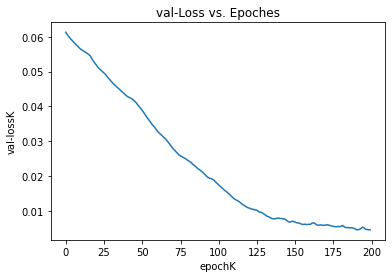

In [28]:
trans_d = trans21_ss[['배방읍', '신창면', '염치읍', '온양1동', '온양2동', '온양3동', 
                      '온양4동', '온양5동', '온양6동', '음봉면', '탕정면',
                      'fm_10', 'fm_20', 'fm_30', 'fm_40', 'fm_50', 'fm_60',
                      'ml_10', 'ml_20', 'ml_30', 'ml_40', 'ml_50', 'ml_60', 
                      '남성유동인구','여성유동인구', '총유동인구' ]]

trans_md=(trans_d-trans_d.min())/(trans_d.max()-trans_d.min())
trans_md=trans_md.append(trans_mad)

# feature model 의 target 설정
trans_mdt=trans_md[['fm_10', 'fm_20', 'fm_30', 'fm_40', 'fm_50', 'fm_60',
                      'ml_10', 'ml_20', 'ml_30', 'ml_40', 'ml_50', 'ml_60', 
                      '남성유동인구','여성유동인구', '총유동인구' ]]

trans_model = Sequential( 
    [ Input(shape=(26)),
      Dense(32, activation='relu'),
      Dropout(0.3),
      Dense(16, activation='relu'),
      BatchNormalization(),
      Dense(3, activation='relu', name='trans_feature'),
      Dense(10, activation='relu'),
      BatchNormalization(),
      Dropout(0.3),
      Dense(15, activation='linear') ]  )

trans_model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = trans_model.fit(x=trans_md, y=trans_mdt, validation_split=0.2, epochs=200)

df=pd.DataFrame(history.history)
df.head()

loss_plot = df.plot(y="val_loss", title="val-Loss vs. Epoches", legend=False)
loss_plot.set(xlabel="epochK",ylabel="val-lossK")
trans_model

In [29]:
# 동별 Feature 찾아내기

feature_extractor = Model(inputs=trans_model.inputs,
    outputs=trans_model.get_layer(name="trans_feature").output )
tt=np.array(trans_mad.values)
features = feature_extractor(tt)

In [30]:
# 종속 독립들을 가지고 간단 linear model

libr1_d=libr1[['대출건수']]
#libr1_nd=(libr1_d-libr1_d.mean())/libr1_d.std()
libr1_nd=(libr1_d-libr1_d.min())/(libr1_d.max()-libr1_d.min())

In [31]:
features = features.numpy()
features = (features-features.min())/(features.max()-features.min())
feat_tran = pd.DataFrame(
    features, index=['배방읍', '신창면', '염치읍', '온양1동', '온양2동',
                           '온양3동', '온양4동', '온양5동', '온양6동', '음봉면', '탕정면']
    , columns=['tran1', 'tran2','tran3'])
fac_pop
fac_pop = fac_pop = (fac_pop-fac_pop.min())/(fac_pop.max()-fac_pop.min())

feat_pop = pd.DataFrame(
    fac_pop, index=['탕정면', '인주면', '음봉면', '온양6동', '온양5동', '온양4동', '온양3동',
     '온양2동','온양1동', '영인면', '염치읍', '신창면', '송악면', '선장면',
     '배방읍', '둔포면', '도고면'],
    columns=['pop1','pop2','pop3'])

In [32]:
fac_scho
fac_scho = fac_scho = (fac_scho-fac_scho.min())/(fac_scho.max()-fac_scho.min())
feat_scho =  pd.DataFrame(
    fac_scho, index=['도고면', '둔포면', '배방읍 ', '선장면', '송악면', '신창면', 
                     '염치읍', '영인면', '온양1동', '온양2동', '온양3동', '온양4동',
                     '온양5동', '온양6동', '음봉면', '인주면', '탕정면'] ,
    columns=['scho1','scho2'])

feat_ind =feat_tran.join(feat_pop, how='outer')
feat_ind =feat_ind.join(feat_scho, how='outer')

feat_ind.iloc[3,0:6]=feat_ind.iloc[2,0:6]
tt=feat_ind.values
tt = np.delete(tt, 2, 0)
feat_ind = pd.DataFrame(tt, index=['도고면', '둔포면', '배방읍', '선장면', 
                             '송악면', '신창면', '염치읍', '영인면', '온양1동',
                             '온양2동', '온양3동', '온양4동', '온양5동', '온양6동', 
                             '음봉면', '인주면', '탕정면'], 
                  columns=feat_ind.columns)
feat_ind = feat_ind.fillna(0)
diss=np.reciprocal(dis)
Feat = np.matmul(feat_ind.T.values, diss.T)
feat = pd.DataFrame(Feat)
feat=feat.T
feat.columns = ["tran1","tran2","tran3","pop1","pop2","pop3","scho1","scho2"]

In [33]:
aa = feat['tran1']+feat['tran2']+feat['tran3']
bb = feat['pop1']+feat['pop2']+feat['pop3']
cc = feat['scho1']+feat['scho2']

data = pd.concat([aa,bb,cc],axis=1)

reg_model = Sequential([
    Input(3),
    Dense(1,activation='relu'),
#     Dense(1,activation='linear')
])

In [34]:
reg_model.compile(optimizer='rmsprop', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

Epoch 1/20
1/1 [==============================] - 1s 651ms/step - loss: 4.6969 - root_mean_squared_error: 2.1672 - val_loss: 4.1186 - val_root_mean_squared_error: 2.0294
Epoch 2/20
1/1 [==============================] - 0s 53ms/step - loss: 4.5864 - root_mean_squared_error: 2.1416 - val_loss: 4.0510 - val_root_mean_squared_error: 2.0127
Epoch 3/20
1/1 [==============================] - 0s 50ms/step - loss: 4.5075 - root_mean_squared_error: 2.1231 - val_loss: 3.9950 - val_root_mean_squared_error: 1.9987
Epoch 4/20
1/1 [==============================] - 0s 55ms/step - loss: 4.4423 - root_mean_squared_error: 2.1077 - val_loss: 3.9458 - val_root_mean_squared_error: 1.9864
Epoch 5/20
1/1 [==============================] - 0s 50ms/step - loss: 4.3849 - root_mean_squared_error: 2.0940 - val_loss: 3.9011 - val_root_mean_squared_error: 1.9751
Epoch 6/20
1/1 [==============================] - 0s 49ms/step - loss: 4.3328 - root_mean_squared_error: 2.0815 - val_loss: 3.8596 - val_root_mean_squared

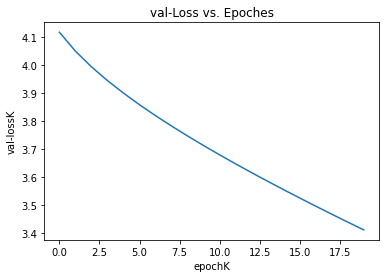

In [35]:
his = reg_model.fit(x=data, y=libr1_nd, validation_split=0.2, epochs=20)


dff=pd.DataFrame(his.history)
dff.head()

los_plot = dff.plot(y="val_loss", title="val-Loss vs. Epoches", legend=False)
los_plot.set(xlabel="epochK",ylabel="val-lossK")

reg_model.weights

for layer in reg_model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]

prediction = reg_model.predict(data)

In [41]:
data

,0,1,2
0,1.297295,4.005924,2.766581
1,1.921481,4.895618,3.474410
2,0.240988,1.747657,1.156148
3,0.682663,2.818822,2.456941
4,0.906101,3.471480,2.057882
5,0.710349,2.798293,2.295972


In [42]:
prediction

array([[4.8735657],
       [5.7321568],
       [2.3621302],
       [4.0062733],
       [4.1611023],
       [3.8411908]], dtype=float32)

In [43]:
# new_loc1 = pd.read_csv('/data1/KSW/아산시/교수님꺼/(최종)도서관_입지후보_용지.csv', encoding='cp949')
# new_loc1 = new_loc1[['위도(생성됨)','경도(생성됨)']]
# new_loc = new_loc1.values
# new_loc

In [36]:
# new library 위치에 따른 예상 찾기
# 위에서 말한 user_np 를 활용

new_loc = np.array( [[36.7864,126.9501],[36.77066,127.0783],
                     [36.77066,127.0783],[36.8437,127.0687]])  #이건 작은 도서관들 위치

n_dis=np.zeros((len(new_loc),len(user_dong))) # 6 (도서관) x 17(행정동)

# 새로운 도서관 위치


for j in range(len(user_np)):
    for i in range(len(new_loc)):
        n_dis[i,j] = dist(new_loc[i,0], new_loc[i,1], user_np[j,1], user_np[j,0])

n_diss=np.reciprocal(n_dis)

n_Feat = np.matmul(feat_ind.T.values, n_diss.T)
n_feat = pd.DataFrame(n_Feat)
n_feat=n_feat.T
n_feat.columns = ["tran1","tran2","tran3","pop1","pop2","pop3","scho1","scho2"]


In [37]:
n_aa = n_feat['tran1']+n_feat['tran2']+n_feat['tran3']
n_bb = n_feat['pop1']+n_feat['pop2']+n_feat['pop3']
n_cc = n_feat['scho1']+n_feat['scho2']

n_data = pd.concat([n_aa,n_bb,n_cc],axis=1)

n_prediction = reg_model.predict(n_data)

1/1 [==============================] - 0s 49ms/step


In [39]:
n_prediction

array([[2.3725746],
       [1.3425293],
       [1.3425293],
       [1.4564708]], dtype=float32)

In [40]:
save=pd.DataFrame(n_prediction)
save.to_csv('606_주거학교모델결과.csv')

In [56]:
feat_tran#유동인구 변화 시퀀셜 모델

,tran1,tran2,tran3
배방읍,0.000000,0.555715,0.515968
신창면,1.000000,0.000000,0.000000
염치읍,0.092059,0.680381,0.650278
온양1동,0.000000,0.322748,0.000000
온양2동,0.000000,0.000000,0.000000
온양3동,0.000000,0.569451,0.000000
온양4동,0.786022,0.043624,0.285580
온양5동,0.000000,0.431140,0.659826
온양6동,0.087388,0.561797,0.478098
음봉면,0.000000,0.581783,0.760512


In [92]:
feat_pop#아산시 주민등록인구 데이터를 사이킷런의 인자분석(FactorAnalysis)를 통한 변화

,pop1,pop2,pop3
탕정면,0.203963,0.318757,0.337681
인주면,0.392327,0.012754,0.000000
음봉면,1.000000,0.178107,0.286427
온양6동,0.189653,0.271247,0.419477
온양5동,0.201684,0.305482,0.448688
온양4동,0.363403,0.636927,0.177286
온양3동,0.224994,0.343810,0.343811
온양2동,0.215212,0.357321,0.251839
온양1동,0.255682,0.167561,0.387236
영인면,0.270204,0.404662,0.220750


In [93]:
feat_scho #아산시 학교 데이터를 사이킷런의 인자분석(FactorAnalysis)를 통한 변화

,scho1,scho2
도고면,0.222157,0.150031
둔포면,0.222821,0.469980
배방읍,0.804652,0.507473
선장면,0.222179,0.160831
송악면,0.222177,0.155381
신창면,0.725427,0.000000
염치읍,0.222173,0.152224
영인면,0.222209,0.165553
온양1동,0.223225,0.718862
온양2동,0.222163,0.149999
